In [1]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import scikitplot          as skplt
from matplotlib            import pyplot          as plt
from matplotlib            import style
from IPython.display       import Image
from IPython.core.display  import HTML
from pylab                 import rcParams
from IPython.display       import Image
from scipy                 import stats           as ss     
from sklearn               import preprocessing   as pp
from sklearn               import model_selection as ms            
from sklearn               import ensemble        as en
from sklearn               import neighbors       as nh
from sklearn               import linear_model    as lm
from sklearn.svm           import SVC             as svc


sns.set_style("darkgrid")
plt.style.use("default")
rcParams['figure.figsize'] = 14,5

# **5 Data preparation**

In [2]:
df4=pd.read_csv(r'C:\Users\caixa\Desktop\mega\ds\5_pa04\df4',low_memory=False)
df5=df4.copy()

In [3]:
# encontrar o poder de generalização pq vai usar dados q o modelo nunca viu

X=df4.drop('response',axis=1)
y=df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(X,y,test_size=0.20)

df5=pd.concat ([x_train, y_train], axis=1) # se torna o dataset de treino

In [65]:
print('X')
print(X.shape)
X.head()

X
(381109, 11)


,id,previously_insured,annual_premium,vintage,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage
0,1,0,40454.0,217,Male,44,28,26,1,over_2_years,1
1,2,0,33536.0,183,Male,76,3,26,1,between_1_2_years,0
2,3,0,38294.0,27,Male,47,28,26,1,over_2_years,1
3,4,1,28619.0,203,Male,21,11,152,1,below_1_year,0
4,5,1,27496.0,39,Female,29,41,152,1,below_1_year,0


In [66]:
print('y')
print(y.shape)
y.head(11)

y
(381109,)


0     1
1     0
2     1
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    1
Name: response, dtype: int64

In [67]:
print('x_train')
print(x_train.shape)
x_train.head()

x_train
(304887, 7)


,annual_premium,vintage,age,region_code,vehicle_damage,previously_insured,policy_sales_channel
108504,-1.619909,0.737024,0.492308,0.101938,1,0,0.209435
25605,0.168245,0.103806,0.076923,0.095761,0,1,0.209435
32195,0.474945,0.685121,0.507692,0.121289,0,1,0.193996
47859,0.621804,0.525952,0.707692,0.079503,1,0,0.209435
361069,-0.145003,0.916955,0.030769,0.059606,0,1,0.353665


In [68]:
print('x_validation')
print(x_validation.shape)
x_validation.head()

x_validation
(76222, 13)


,id,previously_insured,annual_premium,vintage,gender,age,region_code,policy_sales_channel,driving_license,vehicle_damage,vehicle_age_below_1_year,vehicle_age_between_1_2_years,vehicle_age_over_2_years
377956,377957,0,0.991907,0.906574,0.138073,0.723077,0.123157,0.209435,1,1,0,0,1
32389,32390,0,3.542928,0.851211,0.138073,0.569231,0.186238,0.209435,1,1,0,0,1
351717,351718,0,-0.125994,0.332180,0.138073,0.200000,0.062155,0.353665,1,1,1,0,0
376989,376990,0,0.416990,0.775087,0.138073,0.353846,0.128858,0.015688,1,1,0,1,0
4378,4379,0,2.400686,0.612457,0.138073,0.400000,0.186238,0.193996,1,1,0,1,0


In [69]:
print('y_train')
print(y_train.shape)
y_train.head()

y_train
(304887,)


108504    1
25605     0
32195     0
47859     0
361069    0
Name: response, dtype: int64

In [70]:
print('y_validation')
print(y_validation.shape)
y_validation.head()

y_validation
(76222,)


377956    0
32389     0
351717    0
376989    1
4378      1
Name: response, dtype: int64

## **5.1 Standardization**

    subtrair a média e dividir pelo desvio padrão

### **annual_premium**

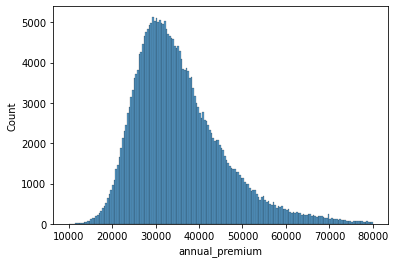

In [4]:
# possue uma distribuição normal sem os outliers
# o correto seria tratar os outliers para fazer a standardization, mas por faltar clareza e ser o primeiro ciclo, deixar assim

aux=df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
aux00=aux.loc[df4['response']==0,'annual_premium']        
sns.histplot(aux00);


In [5]:
ss=pp.StandardScaler()
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values) # duplo colchetes p/ pegar o array -sempre passar como array nos encoders

In [6]:
df5['annual_premium'].head()
df5[['annual_premium']].head()
df5[['annual_premium']].values

array([[-1.61990947],
       [ 0.16824533],
       [ 0.47494511],
       ...,
       [-0.29371688],
       [-0.28258945],
       [ 0.09371473]])

## **5.2 Rescaling**

### **age**

<AxesSubplot:xlabel='age', ylabel='Count'>

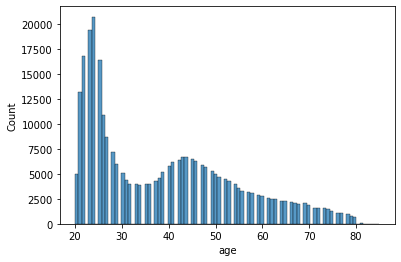

In [7]:
sns.histplot(df5['age']) # plota a predominância ( 25 mil exemplos [não interessados])

# não é próxima de uma normal, por isso rescaling

In [8]:
mms_age=pp.MinMaxScaler()

df5['age']=mms_age.fit_transform(df5[['age']].values)

In [9]:
df5['age'].head()

108504    0.492308
25605     0.076923
32195     0.507692
47859     0.707692
361069    0.030769
Name: age, dtype: float64

### **vintage**

In [10]:
# não possue distribuição 

In [11]:
mms_vintage=pp.MinMaxScaler()
df5['vintage']=mms_vintage.fit_transform(df5[['vintage']].values)

In [12]:
df5['vintage'].head()

108504    0.737024
25605     0.103806
32195     0.685121
47859     0.525952
361069    0.916955
Name: vintage, dtype: float64

## **5.3 Encoder**

### **gender**

In [13]:
# one hot encoding/target encoding

target_encode_gender=df5.groupby('gender')['response'].mean()
df5.loc[:,'gender']=df5['gender'].map(target_encode_gender)

### **region_code**

In [14]:
#  frequency encoding / target encoding / weighted target encoding

# para variáveis categórias com muitos níveis (acima de 6 ou 7) não usar one hot encoding para não aumentar muito a dimensionalidade
# dica do meigarom é usar target encoding
# target encoding = mean encoding

target_encode_region_code=df5.groupby('region_code')['response'].mean()
df5.loc[:,'region_code']=df5['region_code'].map(target_encode_region_code)  # mapear a representatividade em termos de frequência

In [15]:
df5['region_code'].head()

108504    0.101938
25605     0.095761
32195     0.121289
47859     0.079503
361069    0.059606
Name: region_code, dtype: float64

### **vehicle_age**

In [16]:
# pode usar order encoding/one hot encoding/frequency encoding, correndo o risco de desconsiderar carros com 2 meses ou 15 meses por exemplo
# get dummies do pandas = one hot encoding, dummies é melhor por já entregar as colunas mapeadas

df5=pd.get_dummies(df5,prefix='vehicle_age',columns=['vehicle_age'])

In [17]:
df5.head()

,id,previously_insured,annual_premium,vintage,gender,age,region_code,policy_sales_channel,driving_license,vehicle_damage,response,vehicle_age_below_1_year,vehicle_age_between_1_2_years,vehicle_age_over_2_years
108504,108505,0,-1.619909,0.737024,0.138073,0.492308,0.101938,26,1,1,1,0,1,0
25605,25606,1,0.168245,0.103806,0.103680,0.076923,0.095761,26,1,0,0,1,0,0
32195,32196,1,0.474945,0.685121,0.103680,0.507692,0.121289,124,1,0,0,0,1,0
47859,47860,0,0.621804,0.525952,0.103680,0.707692,0.079503,26,1,1,0,0,1,0
361069,361070,1,-0.145003,0.916955,0.138073,0.030769,0.059606,152,1,0,0,1,0,0


### **policy_sales_channel**

In [18]:
df5.groupby('policy_sales_channel').size().head(5)   # só pra entender o .size 

policy_sales_channel
1    875
2      4
3    436
4    410
6      3
dtype: int64

In [19]:
# target encoding/frequency encoding

fe_policy_sales_channel=df5.groupby('policy_sales_channel').size()/len(df5)  # (quantos exemplos por agrupamento e dividir pelo dataset inteiro p/atribuir o peso dessa variávael
# em relação à base inteira)
df5.loc[:,'policy_sales_channel']=df5['policy_sales_channel'].map(fe_policy_sales_channel)

In [20]:
df5['policy_sales_channel'].head(5)

108504    0.209435
25605     0.209435
32195     0.193996
47859     0.209435
361069    0.353665
Name: policy_sales_channel, dtype: float64

### **driving_license** *

In [21]:
# one hot encoding / frequency encoding / target encoding / weighted target encoding

# já está encodado como label encoding = 0 e 1

### **previously_insured** *

In [22]:
# já está encodado como label encoding = 0 e 1

### **vehicle_damage** *

## **5.4 Validation(teste) preparation**

    pegando os encoders do treino e colocando para a validação pra ficar igual
   
    pode ser feito depois, será feito agora só pra ficar pronto
   

In [23]:
# gender
x_validation.loc[:,'gender']=x_validation.loc[:,'gender'].map(target_encode_gender)

# age
x_validation.loc[:,'age']=mms_age.transform(x_validation[['age']].values)

# region_code
x_validation.loc[:,'region_code']=x_validation.loc[:,'region_code'].map(target_encode_region_code) 

# vehicle_age
x_validation=pd.get_dummies(x_validation,prefix='vehicle_age',columns=['vehicle_age'])

# annual_premium
x_validation.loc[:,'annual_premium']=ss.transform(x_validation[['annual_premium']].values)

# policy_sales_channel
x_validation.loc[:,'policy_sales_channel']=x_validation['policy_sales_channel'].map(fe_policy_sales_channel)

# vintage
x_validation.loc[:,'vintage']=mms_vintage.transform(x_validation[['vintage']].values)

# fillna
x_validation=x_validation.fillna(0) # tem regiões (region_code) no teste q n estão no treino

c:\users\caixa\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
c:\users\caixa\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
c:\users\caixa\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set o

# **Passo 6 Feature Selection**

In [24]:
df6=df5.copy()

## **6.1 Importância das features**

In [25]:
# # model definition
# forest=en.ExtraTreesClassifier(n_estimators=250,random_state=0,n_jobs=-1) 

# # recebe os dados de treino e a variável resposta
# # data preparation
# x_train_n=df5.drop(['id','response'],axis=1)
# y_train_n=y_train.values
# forest.fit(x_train_n,y_train_n)


In [26]:
# importances=forest.feature_importances_
# std=np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
# indices=np.argsort(importances)[::-1]  # índice é a importância das árvores ornada pelo maior valor

# # print the feature ranking
# print('Feature ranking')
# df=pd.DataFrame()
# for i, j in zip(x_train_n,forest.feature_importances_): # zip é pra arrumar as colunas com os valores
#     aux=pd.DataFrame({'feature':i,'importance':j},index=[0])
#     df=pd.concat([df,aux],axis=0)
    
# print(df.sort_values('importance',ascending=False))

# # plot the imputiry-based feature importances of the forest
# plt.figure()
# plt.title('feature importances')
# plt.bar(range(x_train_n.shape[1]),importances[indices],color='r',yerr=std[indices],align='center')
# plt.xticks(range(x_train_n.shape[1]),indices)
# plt.xlim([-1,x_train_n.shape[1]])
# plt.show()

# **Passo 7 Machine learning**

In [27]:
df7=df6.copy()

In [28]:
# foi escolhiadas as variáveis até a importância de 0.5 (decisão arbitrária)

cols_selected=['annual_premium','vintage','age','region_code','vehicle_damage','previously_insured','policy_sales_channel']

x_train=df5[cols_selected]
x_val=x_validation[cols_selected]
y_val=y_validation.copy()

In [73]:
print('x_train')
print(x_train.shape)
x_train.head()

x_train
(304887, 7)


,annual_premium,vintage,age,region_code,vehicle_damage,previously_insured,policy_sales_channel
108504,-1.619909,0.737024,0.492308,0.101938,1,0,0.209435
25605,0.168245,0.103806,0.076923,0.095761,0,1,0.209435
32195,0.474945,0.685121,0.507692,0.121289,0,1,0.193996
47859,0.621804,0.525952,0.707692,0.079503,1,0,0.209435
361069,-0.145003,0.916955,0.030769,0.059606,0,1,0.353665


In [75]:
print('x_val')
print(x_val.shape)
x_val.head()

x_val
(76222, 7)


,annual_premium,vintage,age,region_code,vehicle_damage,previously_insured,policy_sales_channel
377956,0.991907,0.906574,0.723077,0.123157,1,0,0.209435
32389,3.542928,0.851211,0.569231,0.186238,1,0,0.209435
351717,-0.125994,0.332180,0.200000,0.062155,1,0,0.353665
376989,0.416990,0.775087,0.353846,0.128858,1,0,0.015688
4378,2.400686,0.612457,0.400000,0.186238,1,0,0.193996


In [76]:
print('y_val')
print(y_val.shape)
y_val.head()

y_val
(76222,)


377956    0
32389     0
351717    0
376989    1
4378      1
Name: response, dtype: int64

## **7.1 Knn**

In [29]:
# model definition
knn_model=nh.KNeighborsClassifier(n_neighbors=7)      # aumentar os neighbors tende a melhorar o modelo

# model training
knn_model.fit(x_train,y_train)      # treinando com dado de treino

# predizer sobre dados que nunca viu = poder de generalização
# model prediction                  # ñ está medindo o poder de aprendizado pq ñ tem os dados de validação 
yhat_knn=knn_model.predict_proba(x_val)

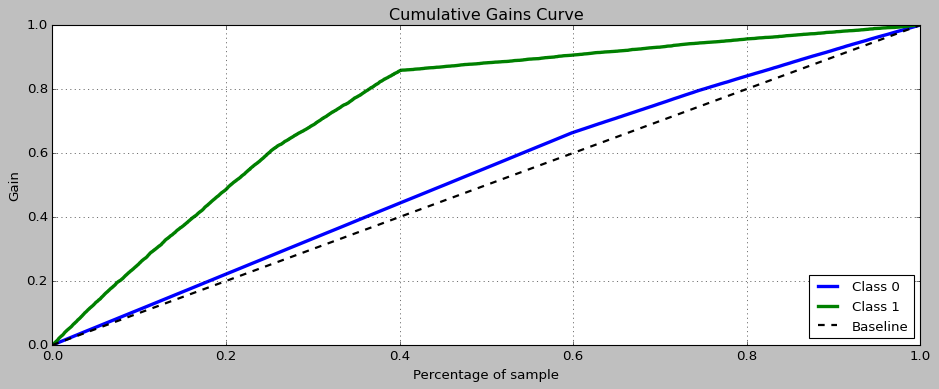

In [30]:
# accumulative gain  - curva acumulada, métrica de ordenação

sns.set_style("whitegrid")
plt.style.use("classic")
rcParams['figure.figsize'] = 14,5
skplt.metrics.plot_cumulative_gain(y_val,yhat_knn);# y_val é o y 'verdadeiro', se a pessoa tinha interesse ou não, e o cálculo de propensão p/ a pessoa feito pelo knn

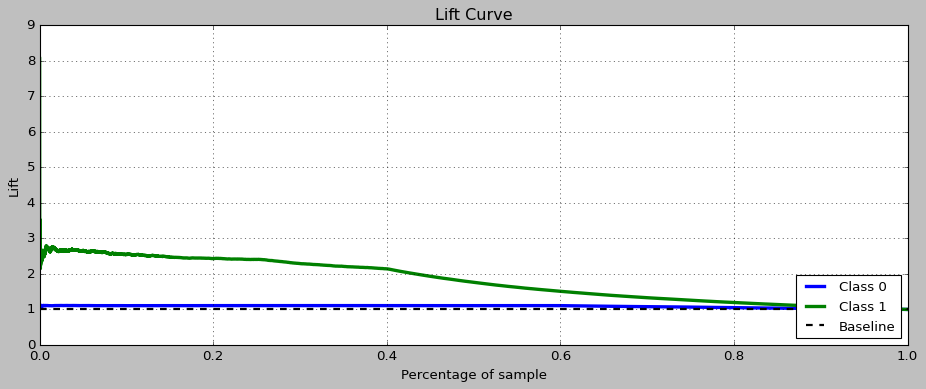

In [41]:
skplt.metrics.plot_lift_curve(y_val,yhat_knn);

In [32]:
# pesquisar métrica de ordenação de lista

## **7.2 Logistic regression**

In [33]:
# regressão logística
# model definition

# lr_model=lm.LogisticRegression(random_state=42)

# # model training
# lr_model.fit(x_train,y_train)

# # model prediction
# yhat_lr=lr_model.predict_proba(x_val);

# # accumulative gain
# skplt.metrics.plot_cumulative_gain(y_val,yhat_lr);


# skplt.metrics.plot_lift_curve(y_val,yhat_lr);

## **7.3 Extra Trees**

In [34]:
# # model definition
# et=en.ExtraTreesClassifier(n_estimators=1000,n_jobs=-1,random_state=42)    # njobs-1 é pra usar os cores da minha máquina

# # model fit
# et.fit(x_train,y_train)

# # model predict
# yhat_et=et.predict_proba(x_val)

## **7.4 Support Vector Machine**

In [35]:
# svc = svc()

# svc.fit(x_train, y_train)

# yhat_svc=svc_model.predict_proba(x_val);

# skplt.metrics.plot_cumulative_gain(y_val,yhat_svc);

## **7.5 Random Forest**

In [36]:
# # model definition

# rf_model=en.RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

# # model training
# rf_model.fit(x_train,y_train)

# # model prediction
# yhat_rf=rf_model.predict_proba(x_val);

# # accumulative gain
# skplt.metrics.plot_cumulative_gain(y_val,yhat_rf);


# skplt.metrics.plot_lift_curve(y_val,yhat_rf);

# **8 Performance metrics** 

## **8.1 Precision and recall**

In [88]:
def precision_at_k( data, k=10 ):
    data = data.reset_index( drop=True )
    data['ranking'] = data.index + 1
    
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    
    return ( data.loc[ k, 'precision_at_k'],data )

In [78]:
def recall_at_k( data, k=15 ):
    data = data.reset_index( drop=True )
    data['ranking'] = data.index + 1
    
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return ( data.loc[ k, 'recall_at_k'], data )

In [79]:
# copy dataframe
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:, 1].tolist()

# sort clients by propensity score
df8 = df8.sort_values( 'score', ascending=False )

# compute precision at k 
precision_at_20, data = precision_at_k( df8, k=20 )

# compute recall at k
recall_at_15, data = recall_at_k( df8, k=15 )

In [101]:
import numpy as np
from sklearn.metrics import top_k_accuracy_score

y_true = np.array([0, 1, 2, 2])
y_score = np.array([[0.5, 0.2, 0.2],  # 0 is in top 2
                    [0.3, 0.4, 0.2],  # 1 is in top 2
                    [0.2, 0.4, 0.3],  # 2 is in top 2
                    [0.7, 0.2, 0.1]]) # 2 isn't in top 2

top_k_accuracy_score(y_true, y_score, k=2)

0.75

## **8.1 Cummulative Curve Manually**

<AxesSubplot:xlabel='base_cum_perc', ylabel='real_cum_perc'>

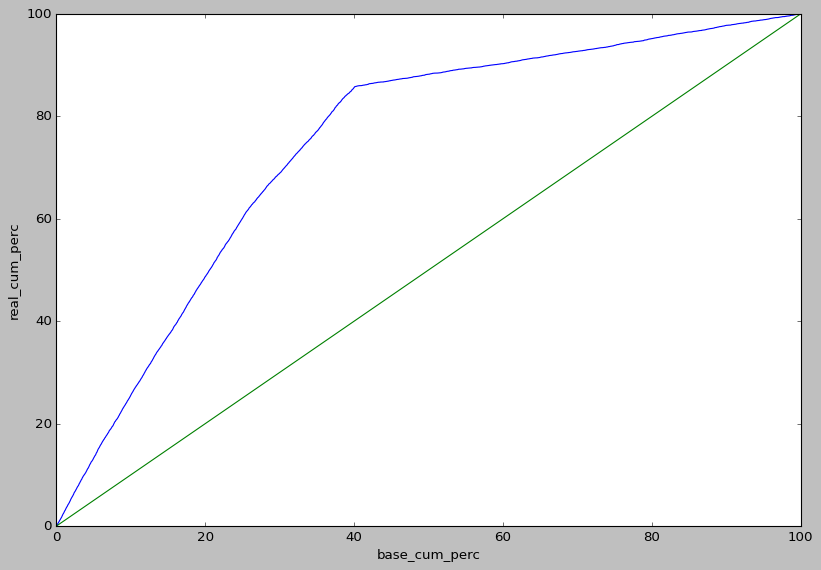

In [102]:
results = pd.DataFrame()
results['prediction'] = yhat_knn[:,1].tolist()
results['real'] = y_val.tolist()

# ordering by prediction
results = results.sort_values( 'prediction', ascending=False )

# Percentage of intereset ( Propensity Score )
results['real_cum'] = results['real'].cumsum() 
results['real_cum_perc'] = 100*results['real_cum']/results['real'].sum()

# Percentage of Base ( Clients )
results['base'] = range( 1, len( results ) + 1  )
results['base_cum_perc'] = 100*results['base']/len( results )

# Basline model
results['baseline'] = results['base_cum_perc']

plt.figure( figsize=(12,8))
sns.lineplot( x='base_cum_perc', y='real_cum_perc', data=results )
sns.lineplot( x='base_cum_perc', y='baseline', data=results )

In [103]:
results

,prediction,real,real_cum,real_cum_perc,base,base_cum_perc,baseline
28644,1.0,0,0,0.000000,1,0.001312,0.001312
19785,1.0,0,0,0.000000,2,0.002624,0.002624
66900,1.0,0,0,0.000000,3,0.003936,0.003936
66305,1.0,1,1,0.010608,4,0.005248,0.005248
59485,1.0,0,1,0.010608,5,0.006560,0.006560
...,...,...,...,...,...,...,...
31887,0.0,0,9427,100.000000,76218,99.994752,99.994752
31890,0.0,0,9427,100.000000,76219,99.996064,99.996064
31892,0.0,0,9427,100.000000,76220,99.997376,99.997376
31893,0.0,0,9427,100.000000,76221,99.998688,99.998688


## **8.2  Lift Curve Manually**

<AxesSubplot:xlabel='base_cum_perc', ylabel='lift'>

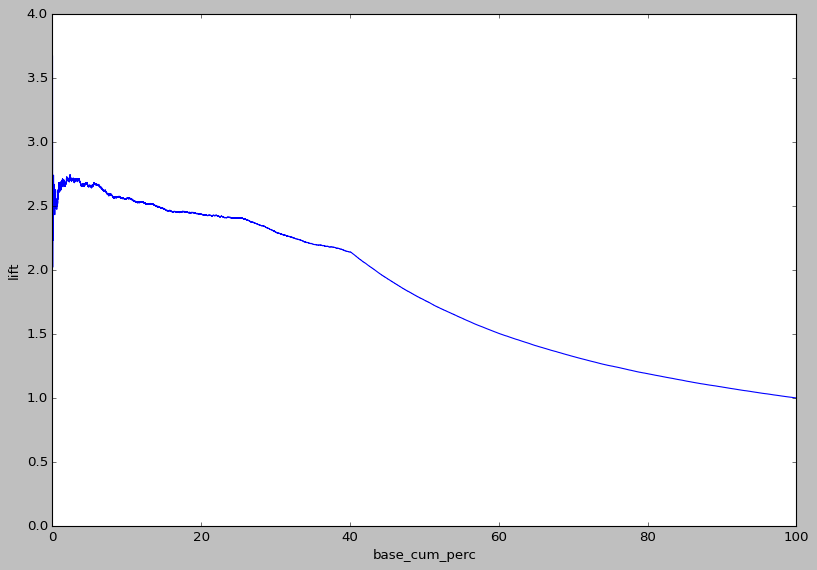

In [105]:
results = pd.DataFrame()
results['prediction'] = yhat_knn[:,1].tolist()
results['real'] = y_val.tolist()

# ordering by prediction
results = results.sort_values( 'prediction', ascending=False )

# Percentage of intereset ( Propensity Score )
results['real_cum'] = results['real'].cumsum() 
results['real_cum_perc'] = 100*results['real_cum']/results['real'].sum()

# Percentage of Base ( Clients )
results['base'] = range( 1, len( results ) + 1  )
results['base_cum_perc'] = 100*results['base']/len( results )

# Basline model
results['baseline'] = results['base_cum_perc']

# Lift Calculation
results['lift'] = results['real_cum_perc'] / results['base_cum_perc']

plt.figure( figsize=(12,8))
sns.lineplot( x='base_cum_perc', y='lift', data=results )

## **8.3  ROI Curve Manually**

<AxesSubplot:xlabel='base_cum_perc', ylabel='lift'>

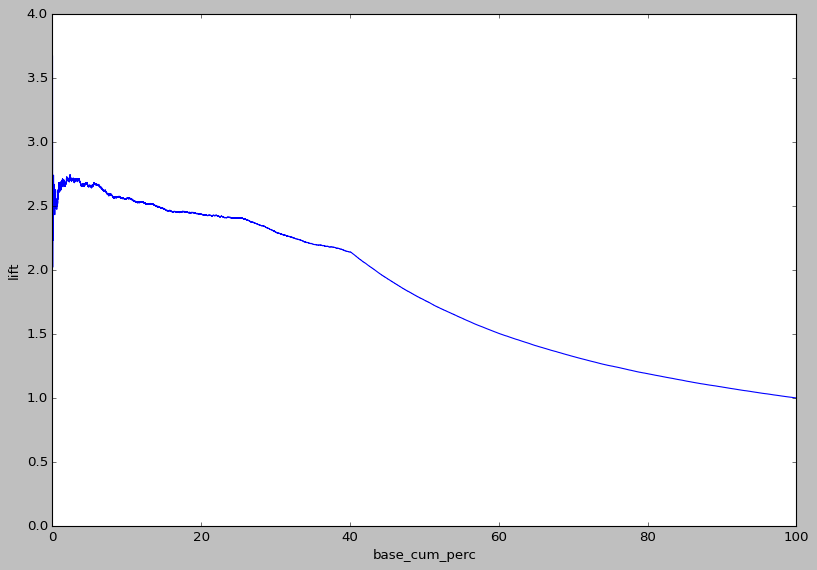

In [109]:
results = pd.DataFrame()
results['prediction'] = yhat_knn[:,1].tolist()
results['real'] = y_val.tolist()


# ordering by prediction
results = results.sort_values( 'prediction', ascending=False )


# Percentage of intereset ( Propensity Score )
results['real_cum'] = results['real'].cumsum() 
results['real_cum_perc'] = 100*results['real_cum']/results['real'].sum()


# Percentage of Base ( Clients )
results['base'] = range( 1, len( results ) + 1  )
results['base_cum_perc'] = 100*results['base']/len( results )


# Basline model
results['baseline'] = results['base_cum_perc']


# Lift Calculation
results['lift'] = results['real_cum_perc'] / results['base_cum_perc']


# ROI Curve
plt.figure( figsize=(12,8))
sns.lineplot( x='base_cum_perc', y='lift', data=results )

In [110]:
results

,prediction,real,real_cum,real_cum_perc,base,base_cum_perc,baseline,lift
28644,1.0,0,0,0.000000,1,0.001312,0.001312,0.000000
19785,1.0,0,0,0.000000,2,0.002624,0.002624,0.000000
66900,1.0,0,0,0.000000,3,0.003936,0.003936,0.000000
66305,1.0,1,1,0.010608,4,0.005248,0.005248,2.021375
59485,1.0,0,1,0.010608,5,0.006560,0.006560,1.617100
...,...,...,...,...,...,...,...,...
31887,0.0,0,9427,100.000000,76218,99.994752,99.994752,1.000052
31890,0.0,0,9427,100.000000,76219,99.996064,99.996064,1.000039
31892,0.0,0,9427,100.000000,76220,99.997376,99.997376,1.000026
31893,0.0,0,9427,100.000000,76221,99.998688,99.998688,1.000013


In [118]:
# Compute bucket
results['bucket'] = results['prediction'].apply( lambda x: 0.9 if x >= 0.90 else 
                                                           0.8 if ( x >= 0.80) & ( x <= 0.90 ) else 
                                                           0.7 if ( x >= 0.70) & ( x <= 0.80 ) else 
                                                           0.6 if ( x >= 0.60) & ( x <= 0.70 ) else 
                                                           0.5 if ( x >= 0.50) & ( x <= 0.60 ) else 
                                                           0.4 if ( x >= 0.40) & ( x <= 0.50 ) else 
                                                           0.3 if ( x >= 0.30) & ( x <= 0.40 ) else 
                                                           0.2 if ( x >= 0.20) & ( x <= 0.30 ) else 
                                                           0.1 if ( x >= 0.10) & ( x <= 0.20 ) else 0.01 )

#  Aggregate clients among buckets
df = results[['prediction','bucket']].groupby( 'bucket' ).agg( {'min', 'count'} ).reset_index()
df.columns = df.columns.droplevel()
df

,,min,count
0,0.01,0.000000,45635
1,0.10,0.142857,11169
2,0.20,0.285714,9391
3,0.40,0.428571,6228
4,0.50,0.571429,2786
5,0.70,0.714286,841
6,0.80,0.857143,149
7,0.90,1.000000,23


In [112]:
# Compute bucket
results['bucket'] = results['prediction'].apply( lambda x: 0.9 if x >= 0.90 else 
                                                           0.8 if ( x >= 0.80) & ( x <= 0.90 ) else 
                                                           0.7 if ( x >= 0.70) & ( x <= 0.80 ) else 
                                                           0.6 if ( x >= 0.60) & ( x <= 0.70 ) else 
                                                           0.5 if ( x >= 0.50) & ( x <= 0.60 ) else 
                                                           0.4 if ( x >= 0.40) & ( x <= 0.50 ) else 
                                                           0.3 if ( x >= 0.30) & ( x <= 0.40 ) else 
                                                           0.2 if ( x >= 0.20) & ( x <= 0.30 ) else 
                                                           0.1 if ( x >= 0.10) & ( x <= 0.20 ) else 0.01 )

#  Aggregate clients among buckets
df = results[['prediction','bucket']].groupby( 'bucket' ).agg( {'min', 'count'} ).reset_index()
df.columns = df.columns.droplevel()
df.columns = ['index', 'clients', 'propensity_score']

# Compute revenue and cost
df['gross_revenue'] = 40 * df['clients'] * df['propensity_score'] 
df['cost'] = 4 * df['clients']

df['base'] = df['clients'].sort_values( ascending=True ).cumsum() / df['clients'].sum()

# revenue
df['revenue'] = df['gross_revenue'] - df['cost']
df = df.sort_values( 'index', ascending=False )
df

,index,clients,propensity_score,gross_revenue,cost,base,revenue
7,0.90,1.000000,23,920.000000,4.000000,1.000000,916.000000
6,0.80,0.857143,149,5108.571429,3.428571,0.750000,5105.142857
5,0.70,0.714286,841,24028.571429,2.857143,0.535714,24025.714286
4,0.50,0.571429,2786,63680.000000,2.285714,0.357143,63677.714286
3,0.40,0.428571,6228,106765.714286,1.714286,0.214286,106764.000000
2,0.20,0.285714,9391,107325.714286,1.142857,0.107143,107324.571429
1,0.10,0.142857,11169,63822.857143,0.571429,0.035714,63822.285714
0,0.01,0.000000,45635,0.000000,0.000000,0.000000,0.000000


In [116]:
results.sample(10)

,prediction,real,real_cum,real_cum_perc,base,base_cum_perc,baseline,lift,bucket
70546,0.142857,0,7883,83.621513,29435,38.617460,38.617460,2.165381,0.10
25547,0.000000,0,9319,98.854355,72376,94.954213,94.954213,1.041074,0.01
36563,0.142857,0,6682,70.881511,23765,31.178662,31.178662,2.273398,0.10
32322,0.142857,0,6524,69.205474,23026,30.209126,30.209126,2.290880,0.10
12479,0.142857,0,7952,84.353453,29810,39.109443,39.109443,2.156856,0.10
49907,0.428571,1,2696,28.598706,8613,11.299887,11.299887,2.530884,0.40
48462,0.285714,0,3682,39.058025,12079,15.847131,15.847131,2.464675,0.20
5826,0.285714,0,4722,50.090167,15722,20.626591,20.626591,2.428427,0.20
16980,0.000000,1,8626,91.503129,49457,64.885466,64.885466,1.410225,0.01
61156,0.428571,0,2671,28.333510,8529,11.189683,11.189683,2.532110,0.40


<AxesSubplot:xlabel='base', ylabel='revenue'>

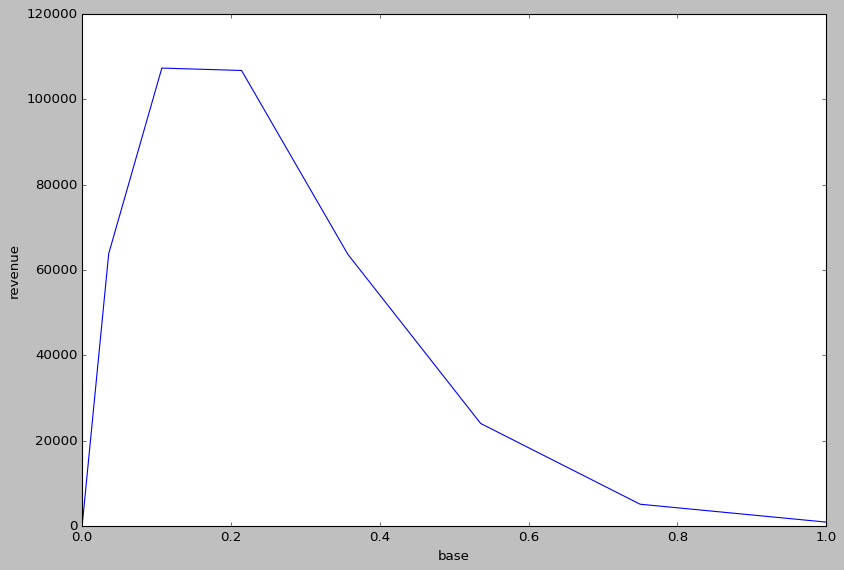

In [108]:
plt.figure( figsize=(12,8))
aux = df[df['propensity_score'] >= 0.1]
sns.lineplot( x='base', y='revenue', data=aux )